In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report

%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [3]:
train = pd.read_csv('train_malware.csv', dtype=dtypes)

In [4]:
train.head(5)

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.00,0,NaN,53447.00,...,36144.00,0,NaN,0.00,0,0,0.00,0.00,10.00,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.00,0,NaN,53447.00,...,57858.00,0,NaN,0.00,0,0,0.00,0.00,8.00,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.00,0,NaN,53447.00,...,52682.00,0,NaN,0.00,0,0,0.00,0.00,3.00,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.00,0,NaN,53447.00,...,20050.00,0,NaN,0.00,0,0,0.00,0.00,3.00,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.00,0,NaN,53447.00,...,19844.00,0,0.00,0.00,0,0,0.00,0.00,1.00,1


In [5]:
train.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [6]:
def update_feature_lists():
    binary = [c for c in train.columns if train[c].nunique() == 2]
    numerical = ['Census_ProcessorCoreCount',
                 'Census_PrimaryDiskTotalCapacity',
                 'Census_SystemVolumeTotalCapacity',
                 'Census_TotalPhysicalRAM',
                 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
                 'Census_InternalPrimaryDisplayResolutionHorizontal',
                 'Census_InternalPrimaryDisplayResolutionVertical',
                 'Census_InternalBatteryNumberOfCharges']
    categorical = [c for c in train.columns if (c not in numerical) & (c not in binary)]
    return binary, numerical, categorical
    
binary_columns, true_numerical_columns, categorical_columns = update_feature_lists()

In [7]:
train.shape

(8921483, 83)

In [8]:
train.isnull().sum()

MachineIdentifier                               0
ProductName                                     0
EngineVersion                                   0
AppVersion                                      0
AvSigVersion                                    0
                                            ...  
Census_IsPenCapable                             0
Census_IsAlwaysOnAlwaysConnectedCapable     71343
Wdft_IsGamer                               303451
Wdft_RegionIdentifier                      303451
HasDetections                                   0
Length: 83, dtype: int64

In [9]:
high_cardinality_columns = [c for c in categorical_columns if train[c].nunique() > 500]
high_cardinality_columns.remove('MachineIdentifier')  # Remove ID
train.drop(high_cardinality_columns, axis=1, inplace=True)
print('Columns with high cardinality: ', high_cardinality_columns)

Columns with high cardinality:  ['AvSigVersion', 'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier', 'CityIdentifier', 'OsBuildLab', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorModelIdentifier', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier']


In [10]:
#Remove columns with more than 40% missing data
high_null_columns = [c for c in train.columns if train[c].count() < len(train)*0.6]
train.drop(high_null_columns, axis=1, inplace=True)
print('Columns with more than 40% null values: ', high_null_columns)

Columns with more than 40% null values:  ['PuaMode', 'Census_ProcessorClass', 'Census_InternalBatteryType', 'Census_IsFlightingInternal', 'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled']


In [11]:
unwanted_columns = ['MachineIdentifier']
train.drop(unwanted_columns, axis=1, inplace=True)

In [12]:
train.dropna(subset=true_numerical_columns, inplace=True)

In [13]:
binary_columns, true_numerical_columns, categorical_columns = update_feature_lists()

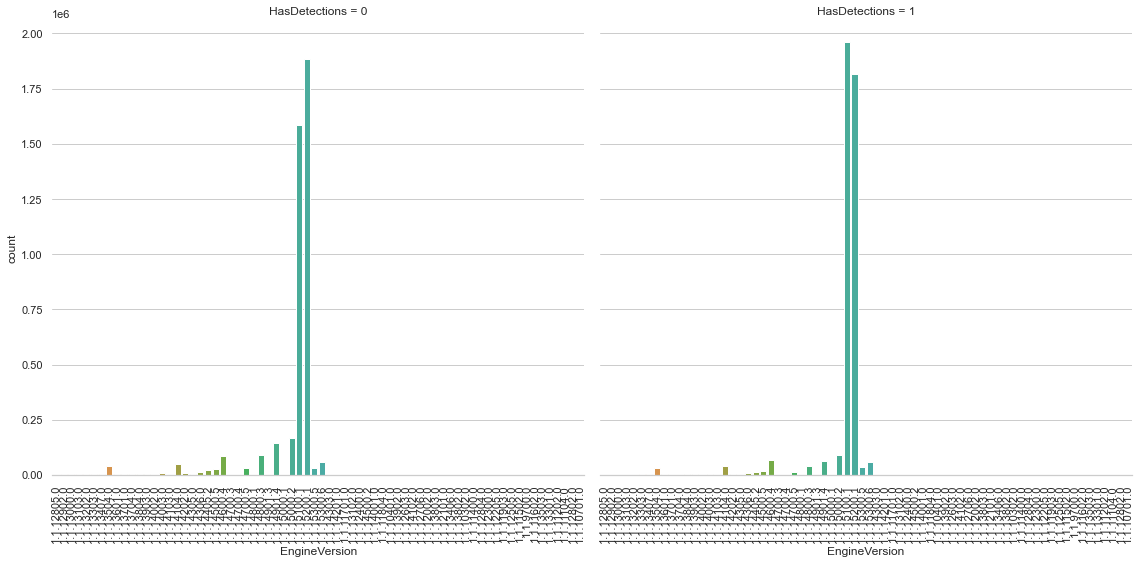

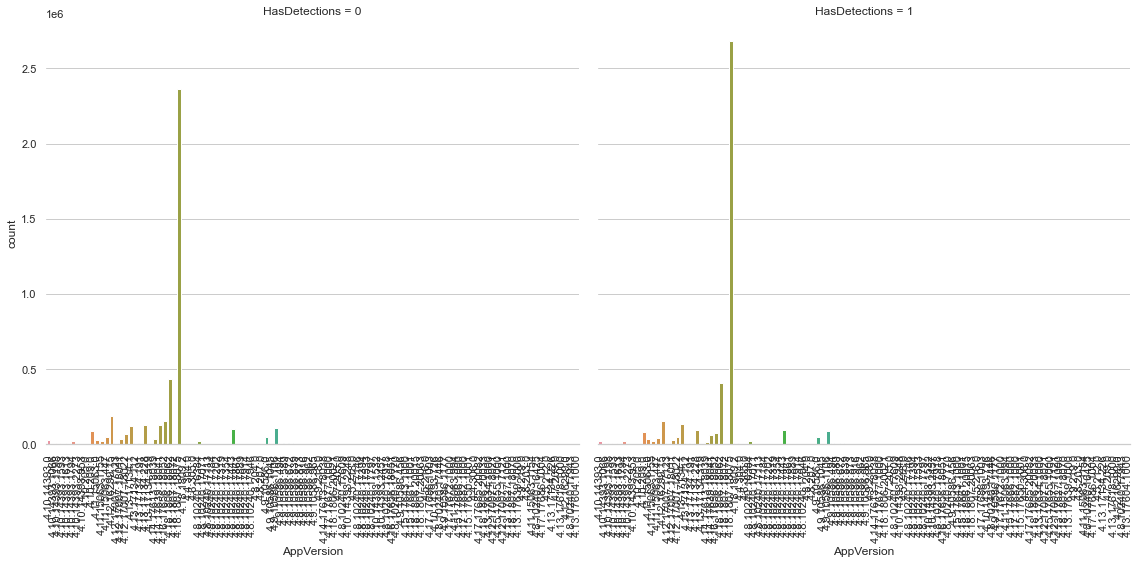

In [14]:
def plot_label_distribution():
    for feature in (binary_columns + categorical_columns):
        if 'Version' in feature and feature != 'Census_OSVersion':
            sns.catplot(data=train, x=feature, col="HasDetections", kind="count", height=8).set_xticklabels(rotation=90)
            sns.despine(left=True)
            plt.tight_layout()

plot_label_distribution()

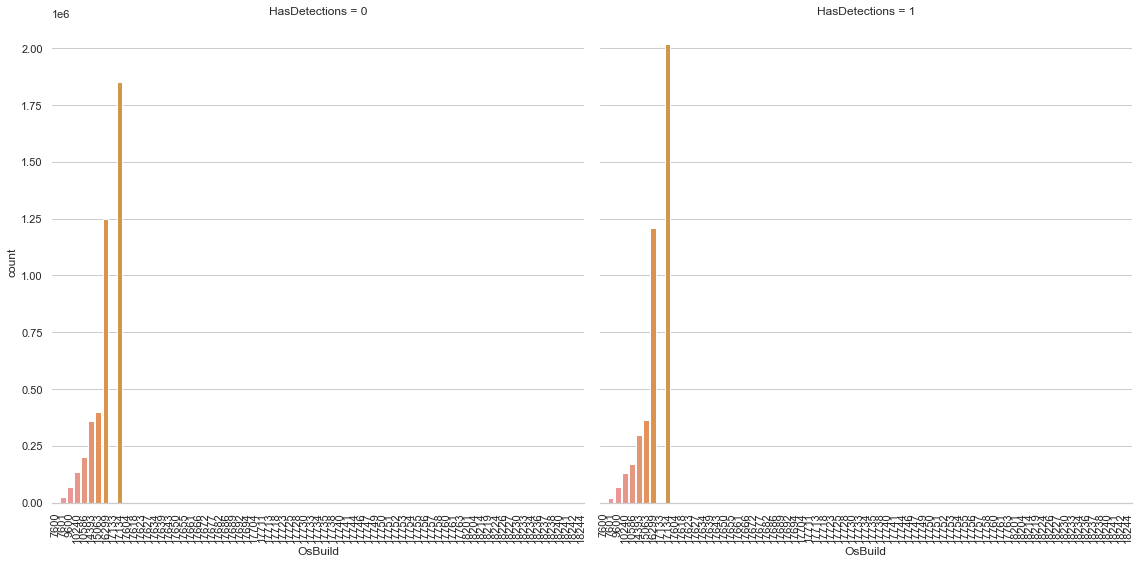

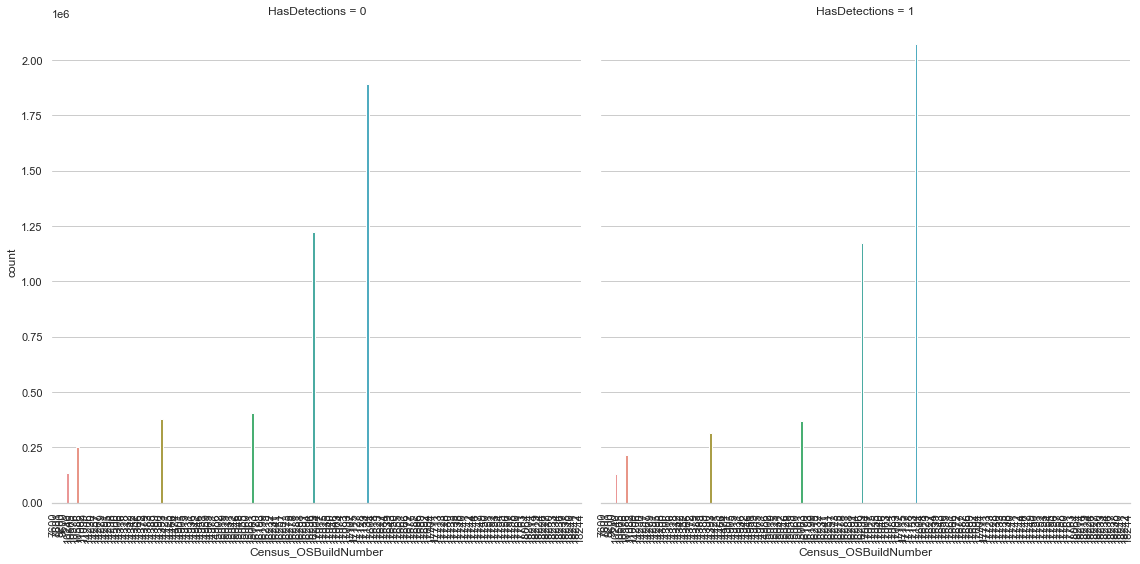

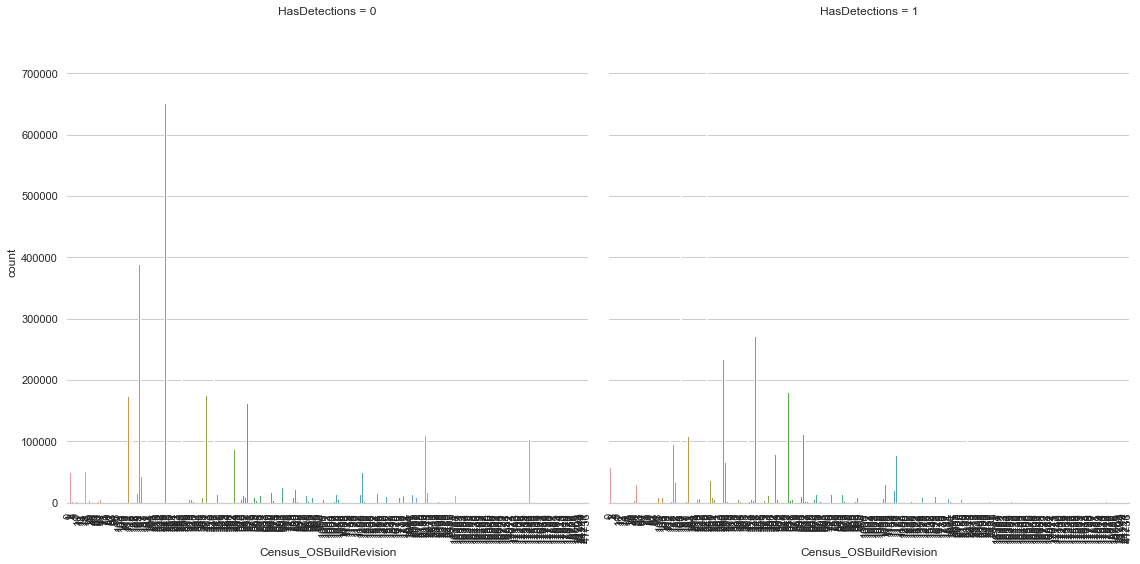

In [15]:
def plot_label_distribution():
    for feature in (binary_columns + categorical_columns):
        if 'Build' in feature and feature != 'OsBuildLab':
            sns.catplot(data=train, x=feature, col="HasDetections", kind="count", height=8).set_xticklabels(rotation=90)
            sns.despine(left=True)
            plt.tight_layout()

plot_label_distribution()

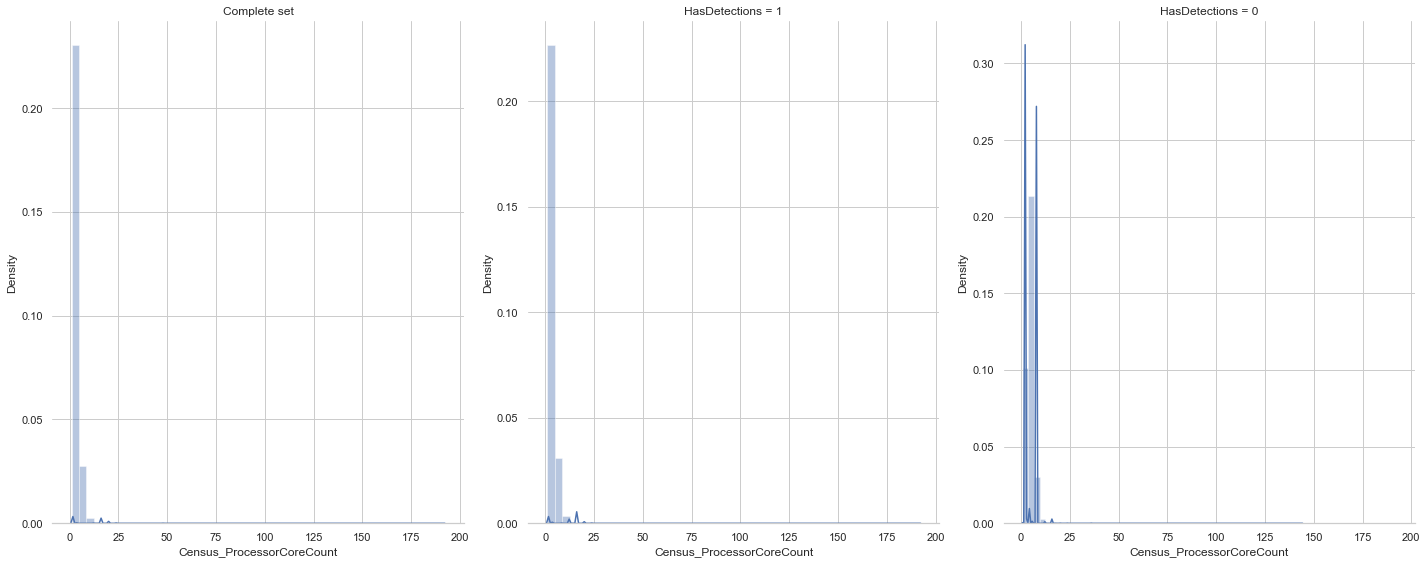

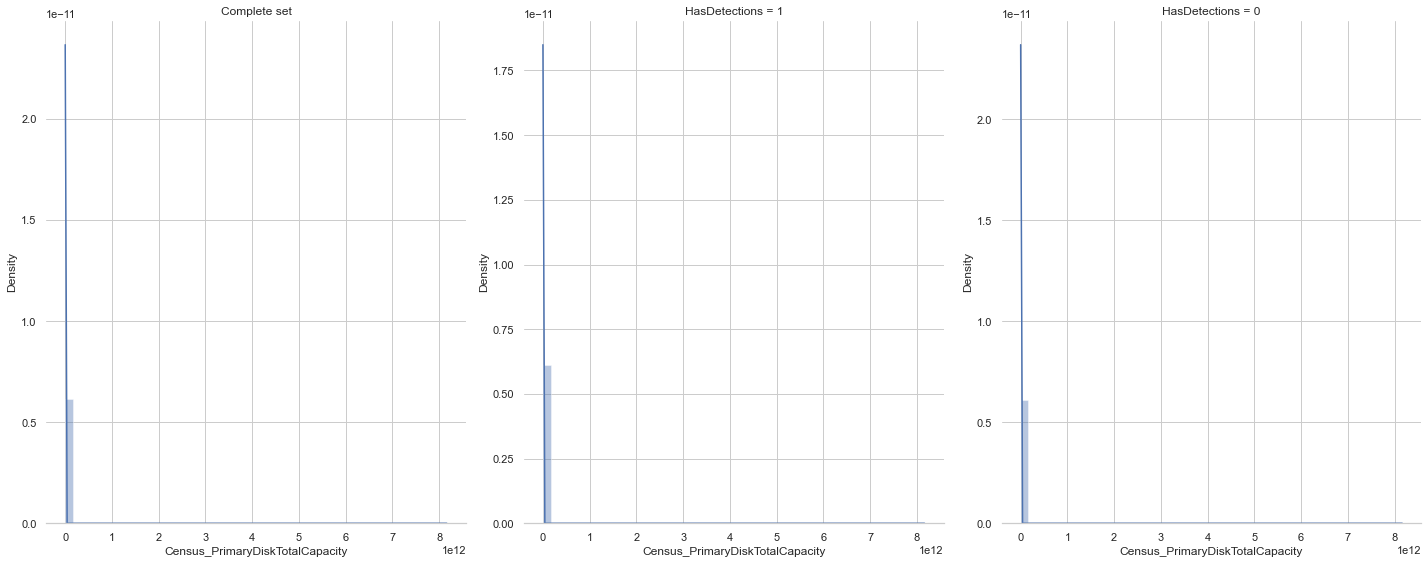

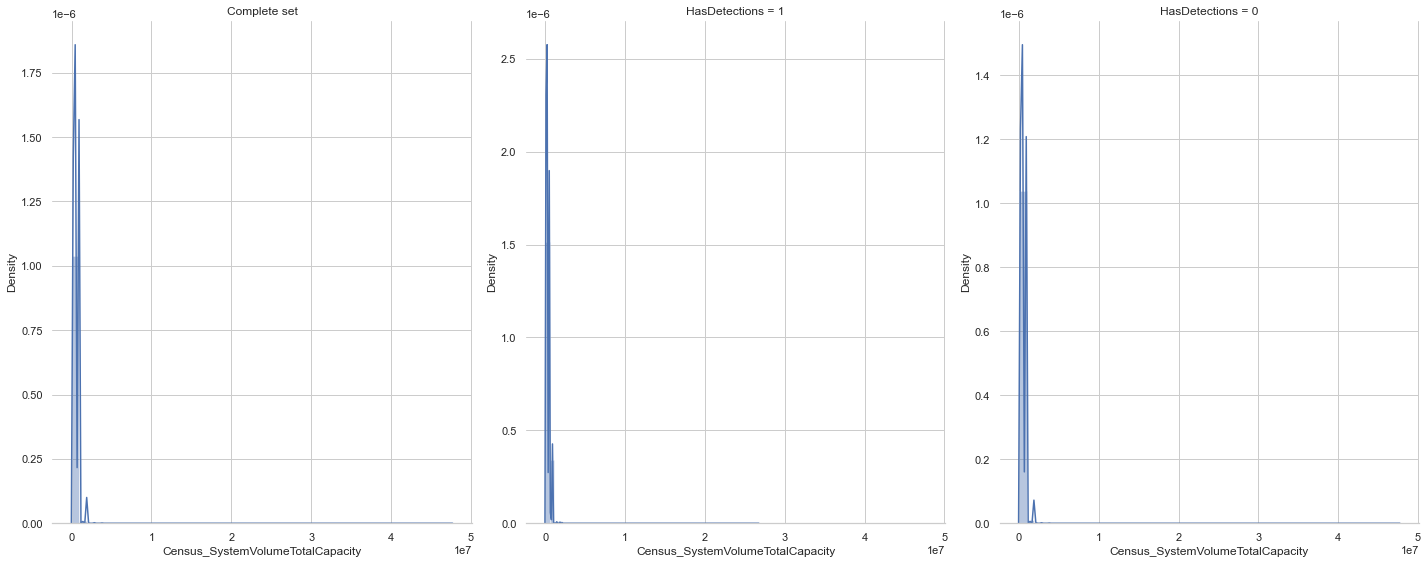

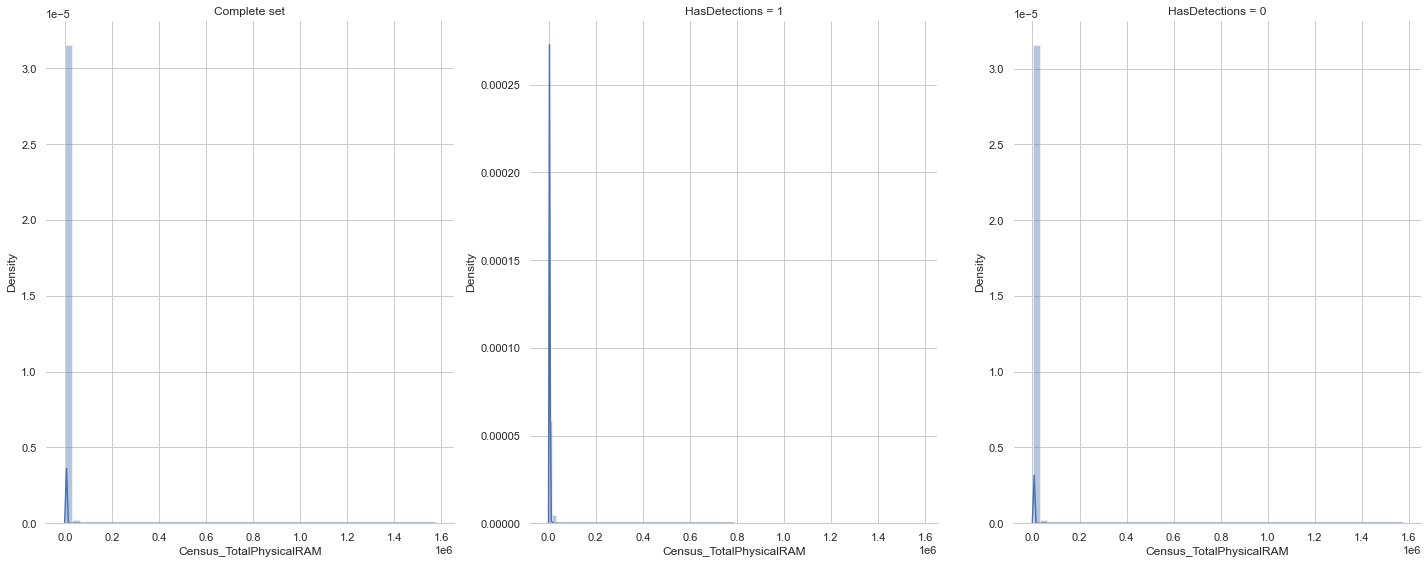

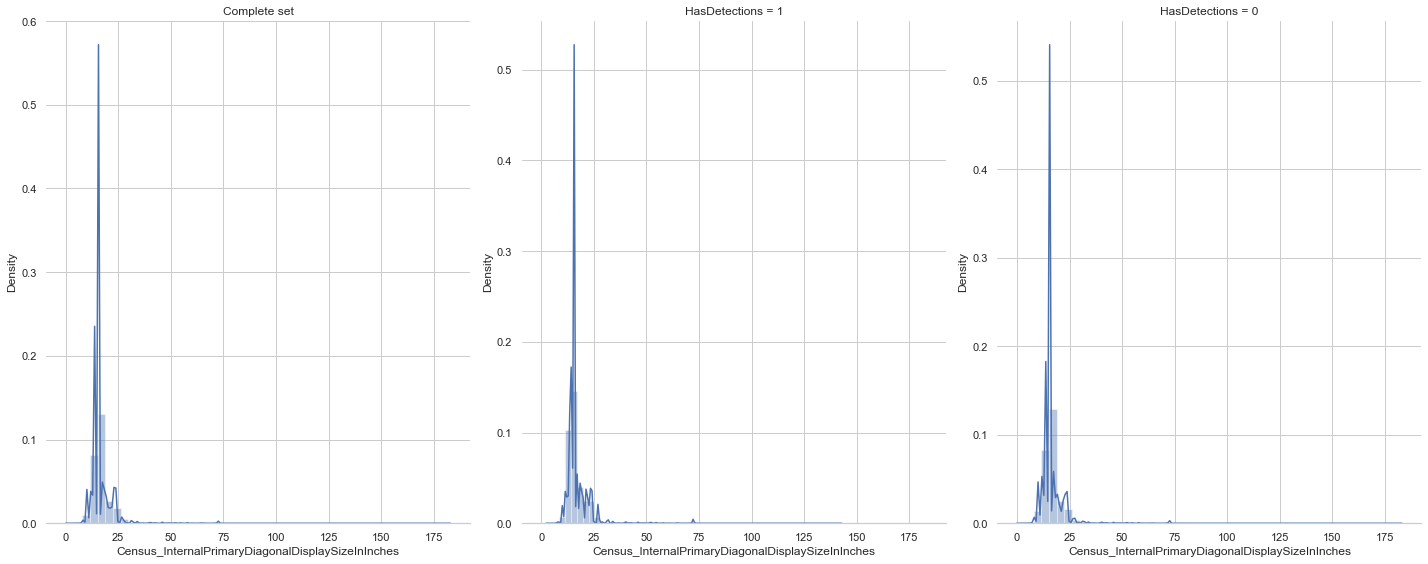

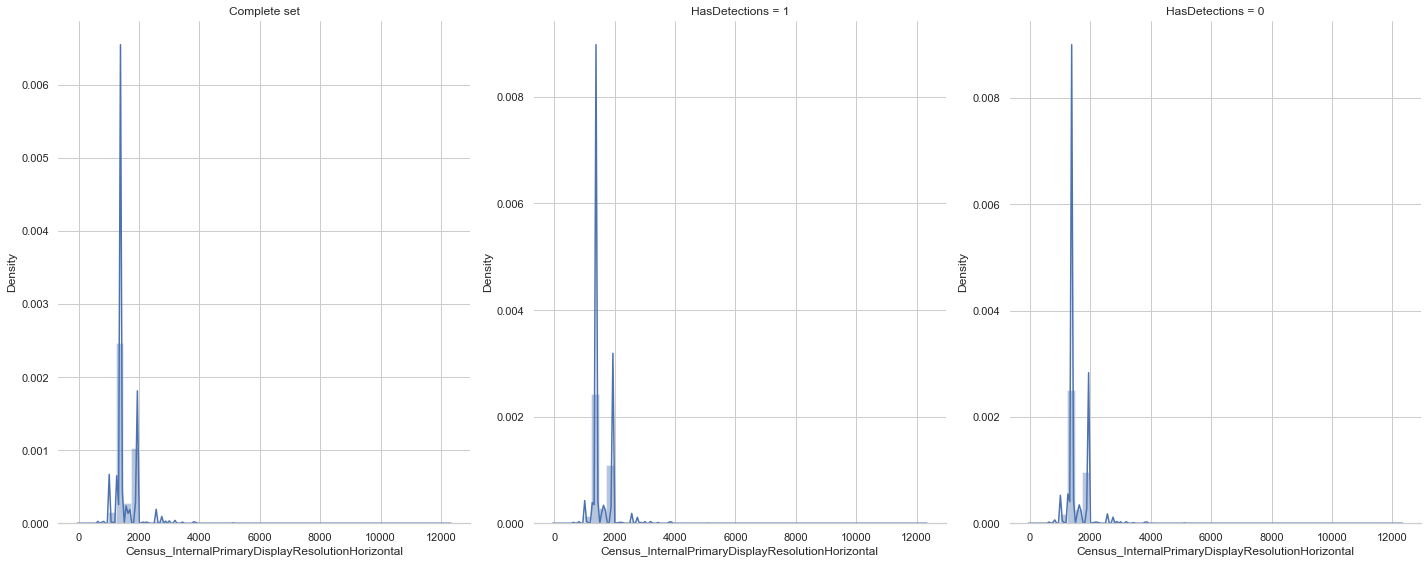

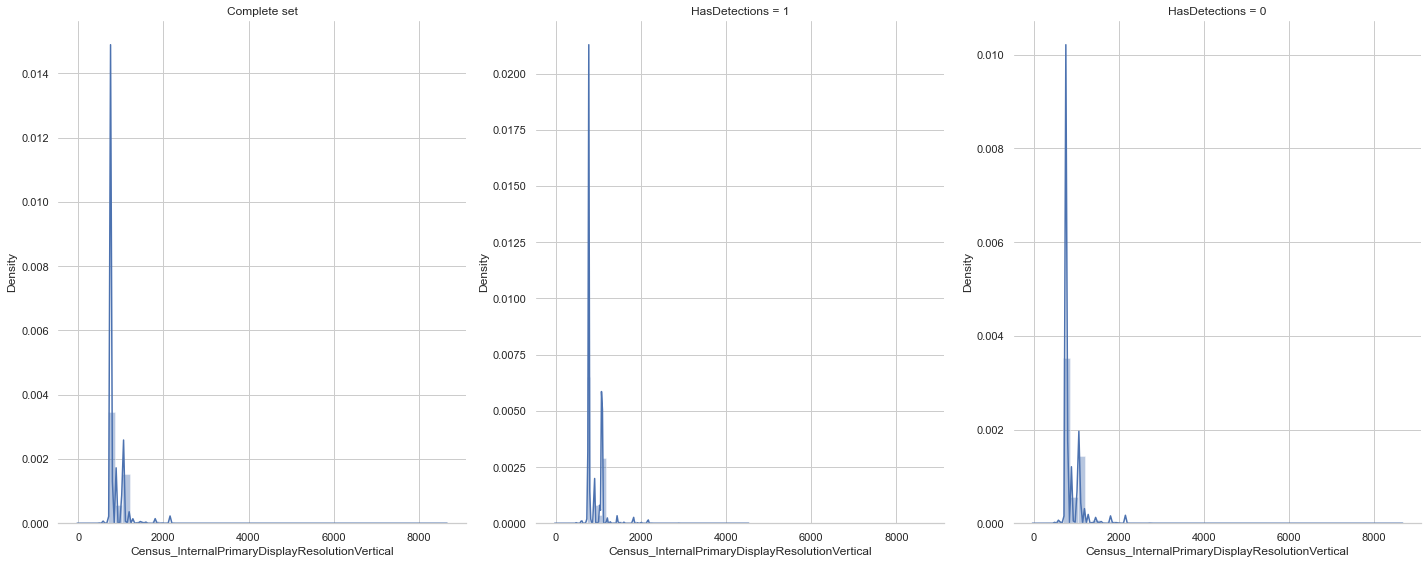

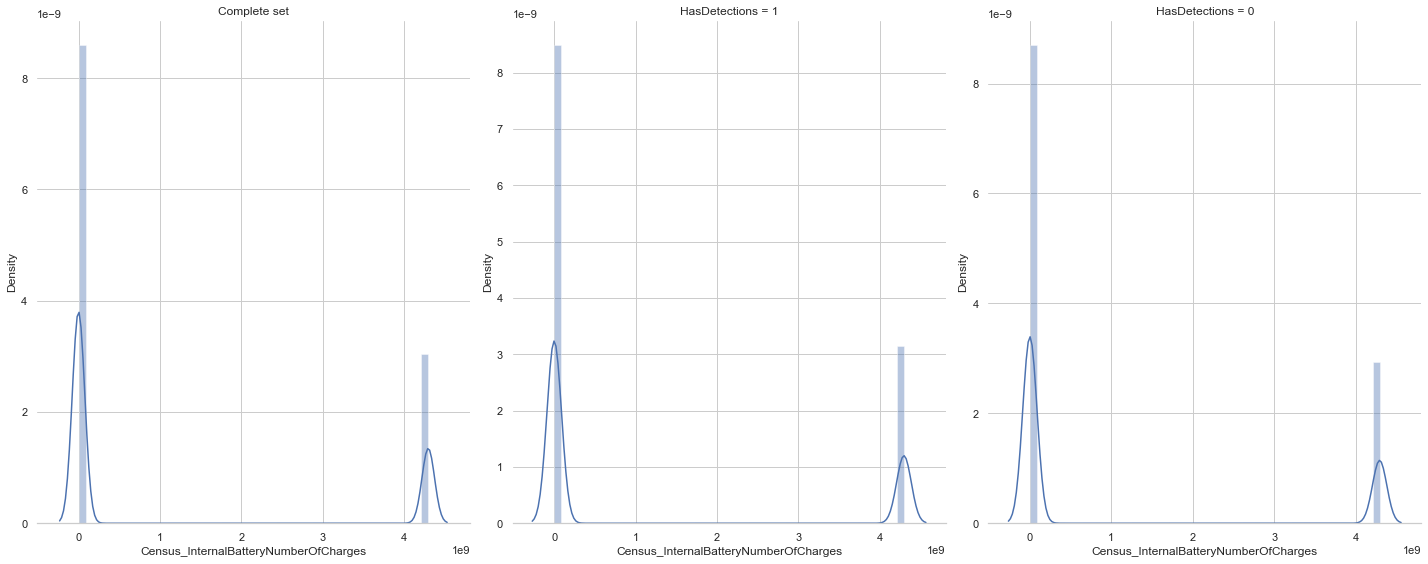

In [16]:
def plot_distribution():
    for feature in true_numerical_columns:
        f, axes = plt.subplots(1, 3, figsize=(20, 8), sharex=True)
        sns.distplot(train[feature], ax=axes[0]).set_title("Complete set")
        sns.distplot(train[train['HasDetections']==1][feature], ax=axes[1]).set_title("HasDetections = 1")
        sns.distplot(train[train['HasDetections']==0][feature], ax=axes[2]).set_title("HasDetections = 0")
        sns.despine(left=True)
        plt.tight_layout()

plot_distribution()

In [17]:
train.head()

,ProductName,EngineVersion,AppVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Census_IsFlightsDisabled,Census_FlightRing,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,win8defender,1.1.15100.1,4.18.1807.18075,0,7.00,0,1.00,1.00,1,29,...,0.00,Retail,0,0.00,0,0,0.00,0.00,10.00,0
1,win8defender,1.1.14600.4,4.13.17134.1,0,7.00,0,1.00,1.00,1,93,...,0.00,NOT_SET,0,0.00,0,0,0.00,0.00,8.00,0
2,win8defender,1.1.15100.1,4.18.1807.18075,0,7.00,0,1.00,1.00,1,86,...,0.00,Retail,0,0.00,0,0,0.00,0.00,3.00,0
3,win8defender,1.1.15100.1,4.18.1807.18075,0,7.00,0,1.00,1.00,1,88,...,0.00,Retail,0,0.00,0,0,0.00,0.00,3.00,1
4,win8defender,1.1.15100.1,4.18.1807.18075,0,7.00,0,1.00,1.00,1,18,...,0.00,Retail,0,0.00,0,0,0.00,0.00,1.00,1


In [18]:
train[true_numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Census_ProcessorCoreCount,8585688.00,NaN,0.00,1.00,2.00,4.00,4.00,192.00
Census_PrimaryDiskTotalCapacity,8585688.00,3006892.50,4524349440.00,0.00,239372.00,476940.00,953869.00,8160436813824.00
Census_SystemVolumeTotalCapacity,8585688.00,382814.78,323253.44,0.00,120815.00,249604.00,475978.00,47687100.00
Census_TotalPhysicalRAM,8585688.00,6124.35,4987.17,255.00,4096.00,4096.00,8192.00,1572864.00
Census_InternalPrimaryDiagonalDisplaySizeInInches,8585688.00,NaN,0.00,0.70,13.90,15.50,17.20,182.25
Census_InternalPrimaryDisplayResolutionHorizontal,8585688.00,NaN,NaN,-1.00,1366.00,1366.00,1920.00,12288.00
Census_InternalPrimaryDisplayResolutionVertical,8585688.00,NaN,NaN,-1.00,768.00,768.00,1080.00,8640.00
Census_InternalBatteryNumberOfCharges,8585688.00,1122106240.00,1931297920.00,0.00,0.00,0.00,4294967296.00,4294967296.00


In [19]:
train.dropna(inplace=True)

In [20]:
labels = train['HasDetections']
train.drop('HasDetections', axis=1, inplace=True)

X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.15,random_state=1)

In [21]:
binary_columns, true_numerical_columns, categorical_columns = update_feature_lists()

# Label encoder
indexer = {}
for col in categorical_columns:
    _, indexer[col] = pd.factorize(X_train[col])
    
for col in categorical_columns:
    X_train[col] = indexer[col].get_indexer(X_train[col])
    X_val[col] = indexer[col].get_indexer(X_val[col])

In [22]:
params = {'num_leaves': 60,
         'min_data_in_leaf': 100, 
         'objective':'binary',
         'max_depth': -1,
         'learning_rate': 0.1,
         "boosting": "gbdt",
         "feature_fraction": 0.8,
         "bagging_freq": 1,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 1,
         "metric": 'auc',
         "lambda_l1": 0.1,
         "random_state": 133,
         "verbosity": -1}

In [23]:
!pip install lightgbm

In [24]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, label=Y_train)
lgb_val = lgb.Dataset(X_val, label=Y_val)

In [25]:
model = lgb.train(params, lgb_train, 1000, valid_sets=[lgb_train, lgb_val], early_stopping_rounds=200, verbose_eval=100)

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.740788	valid_1's auc: 0.739968
[200]	training's auc: 0.745803	valid_1's auc: 0.74364
[300]	training's auc: 0.748734	valid_1's auc: 0.745125
[400]	training's auc: 0.751062	valid_1's auc: 0.745939
[500]	training's auc: 0.753026	valid_1's auc: 0.746419
[600]	training's auc: 0.754929	valid_1's auc: 0.746912
[700]	training's auc: 0.756639	valid_1's auc: 0.747225
[800]	training's auc: 0.758261	valid_1's auc: 0.747456
[900]	training's auc: 0.759768	valid_1's auc: 0.747585
[1000]	training's auc: 0.761288	valid_1's auc: 0.747788
Did not meet early stopping. Best iteration is:
[1000]	training's auc: 0.761288	valid_1's auc: 0.747788


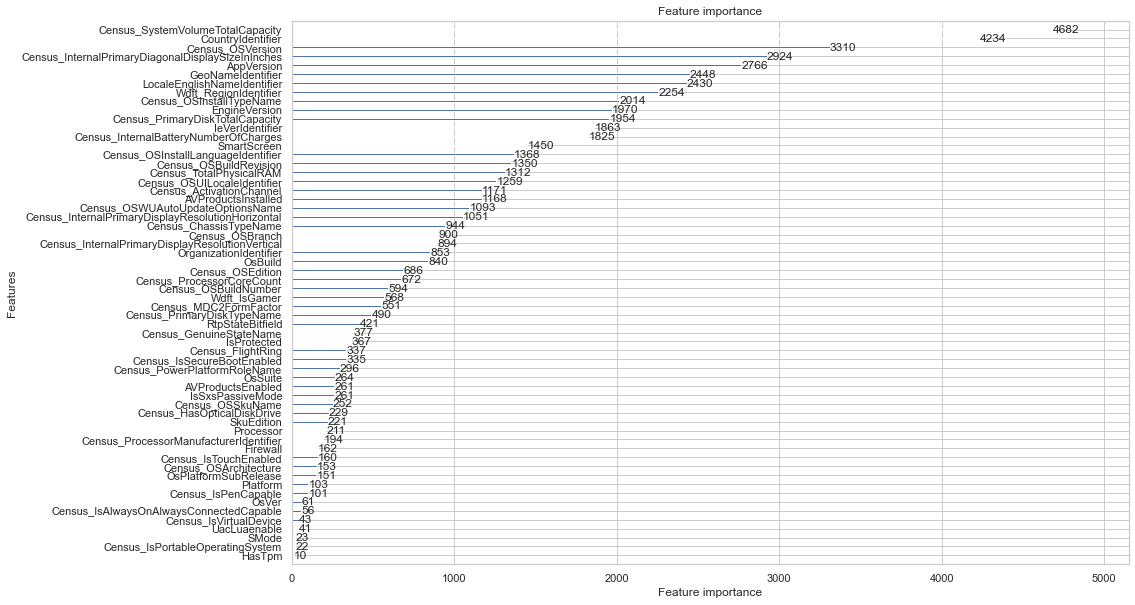

In [26]:
lgb.plot_importance(model, figsize=(15, 10))
plt.show()

In [27]:
train_predictions_raw = model.predict(X_train, num_iteration=model.best_iteration)
val_predictions_raw = model.predict(X_val, num_iteration=model.best_iteration)

train_predictions = np.around(train_predictions_raw)
val_predictions = np.around(val_predictions_raw)

In [28]:
target_names=['HasDetections = 0', 'HasDetections = 1']
print(classification_report(Y_train, train_predictions, target_names=target_names))
print(classification_report(Y_val, val_predictions, target_names=target_names))

                   precision    recall  f1-score   support

HasDetections = 0       0.67      0.71      0.69   1409602
HasDetections = 1       0.71      0.67      0.69   1510157

         accuracy                           0.69   2919759
        macro avg       0.69      0.69      0.69   2919759
     weighted avg       0.69      0.69      0.69   2919759

                   precision    recall  f1-score   support

HasDetections = 0       0.66      0.70      0.68    249299
HasDetections = 1       0.70      0.66      0.68    265953

         accuracy                           0.68    515252
        macro avg       0.68      0.68      0.68    515252
     weighted avg       0.68      0.68      0.68    515252



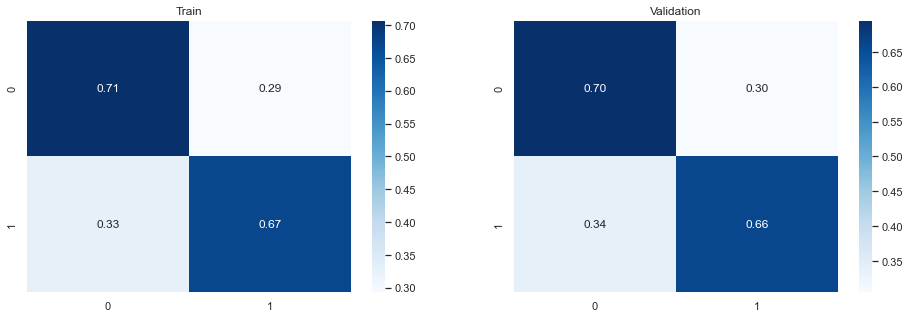

In [29]:
f, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True)
train_cnf_matrix = confusion_matrix(Y_train, train_predictions)
val_cnf_matrix = confusion_matrix(Y_val, val_predictions)

train_cnf_matrix_norm = train_cnf_matrix / train_cnf_matrix.sum(axis=1)[:, np.newaxis]
val_cnf_matrix_norm = val_cnf_matrix / val_cnf_matrix.sum(axis=1)[:, np.newaxis]

train_df_cm = pd.DataFrame(train_cnf_matrix_norm, index=[0, 1], columns=[0, 1])
val_df_cm = pd.DataFrame(val_cnf_matrix_norm, index=[0, 1], columns=[0, 1])

sns.heatmap(train_df_cm, annot=True, fmt='.2f', cmap="Blues", ax=axes[0]).set_title("Train")
sns.heatmap(val_df_cm, annot=True, fmt='.2f', cmap="Blues", ax=axes[1]).set_title("Validation")
plt.show()

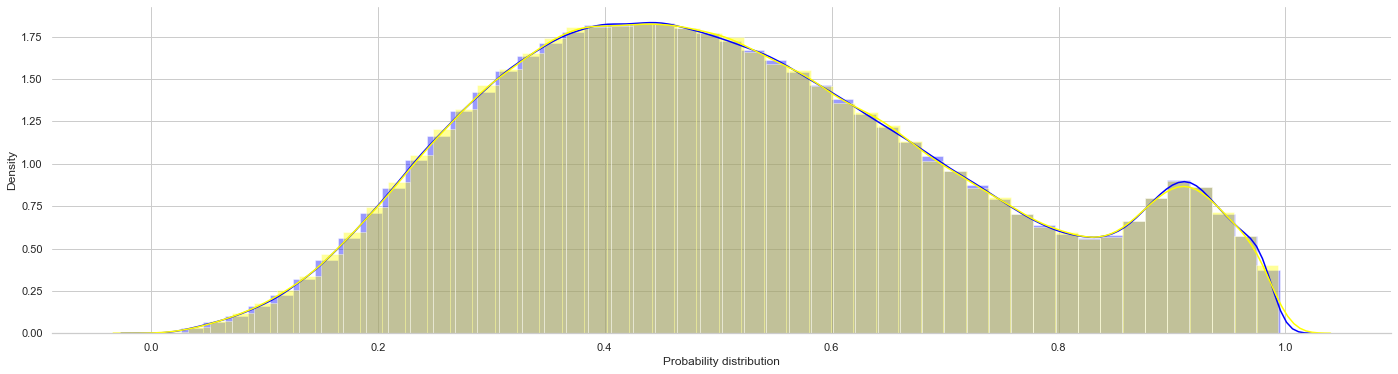

In [30]:
f, ax = plt.subplots(figsize=(24, 6))
sns.set_color_codes("pastel")
ax = sns.distplot(train_predictions_raw, color="blue", kde_kws={"label": "Train"}, axlabel='Probability distribution')
ax = sns.distplot(val_predictions_raw, color="yellow", kde_kws={"label": "Validation"})
sns.despine(left=True)

In [31]:
test = pd.read_csv('test_malware.csv', dtype=dtypes, usecols=(['MachineIdentifier'] + list(X_train.columns))).head(n=1000000)

In [32]:
submission = pd.DataFrame({"MachineIdentifier":test['MachineIdentifier']}) #pre-process test
test.drop('MachineIdentifier', axis=1, inplace=True)

for col in categorical_columns:
    test[col] = indexer[col].get_indexer(test[col])

In [33]:
predictions = model.predict(test, num_iteration=model.best_iteration)

In [34]:
submission["HasDetections"] = predictions
submission.to_csv("submission.csv", index=False)
submission.head(10)

,MachineIdentifier,HasDetections
0,0000010489e3af074adeac69c53e555e,0.94
1,00000176ac758d54827acd545b6315a5,0.38
2,0000019dcefc128c2d4387c1273dae1d,0.36
3,0000055553dc51b1295785415f1a224d,0.35
4,00000574cefffeca83ec8adf9285b2bf,0.49
5,000007ffedd31948f08e6c16da31f6d1,0.83
6,000008f31610018d898e5f315cdf1bd1,0.57
7,00000a3c447250626dbcc628c9cbc460,0.62
8,00000b6bf217ec9aef0f68d5c6705897,0.74
9,00000b8d3776b13e93ad83676a28e4aa,0.36
